In [0]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage import util, transform
from skimage.transform import hough_circle, hough_circle_peaks
from skimage import morphology, draw, filters

# To Code Up:
------------------------------------------

- ## Percentage of looking at mirrors?
- ## Head movement analysis -> too hard with this data
- ## Percentage looking at road

------------------------------------------

- ## Moments of fast eye transistions when too much traffic -> sample more at these stages
- ## Fatigued, or low traffic area == no cognitive overload and thus let guard down ie, less observation ( this will particularly help by blurring ie, will show how eyes don't often move to observe surroundings)
- ## Visual memory <- blurring aids in this

# More Scope:
------------------------------------------

- ## Object detection in video?
-

In [0]:
# Read the video from specified path 
cam = cv2.VideoCapture("./eyetracking_driver.flv") 
  
try: 
    # creating a folder named data 
    if not os.path.exists('data'): 
        os.makedirs('data') 
  
# if not created then raise error 
except OSError: 
    print ('Error: Creating directory of data') 


In [0]:
count = 0

while cam.isOpened():
    ret, frame = cam.read()

    if ret:
        cv2.imwrite('./data/frame{:d}.jpg'.format(count), frame)
        print("Creating ./data/frame{:d}.jpg".format(count))
        count += 50 # i.e. at 30 fps, this advances one second
        cam.set(1, count)
    else:
        cam.release()
        break

In [0]:
def threshold_img(img, T):
    img[img <= T] = 0
    img[img > T] = 255
    return img

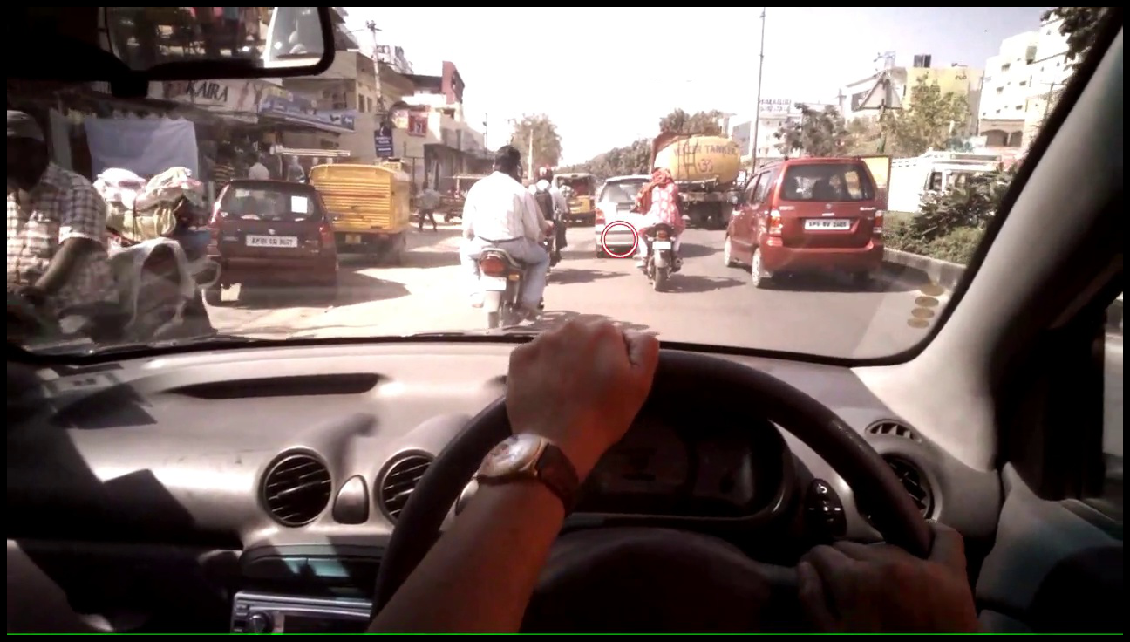

In [7]:
rgb_image = cv2.imread("./data/frame900.jpg")
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,20)) 
plt.axis("off")
plt.imshow(rgb_image)

1


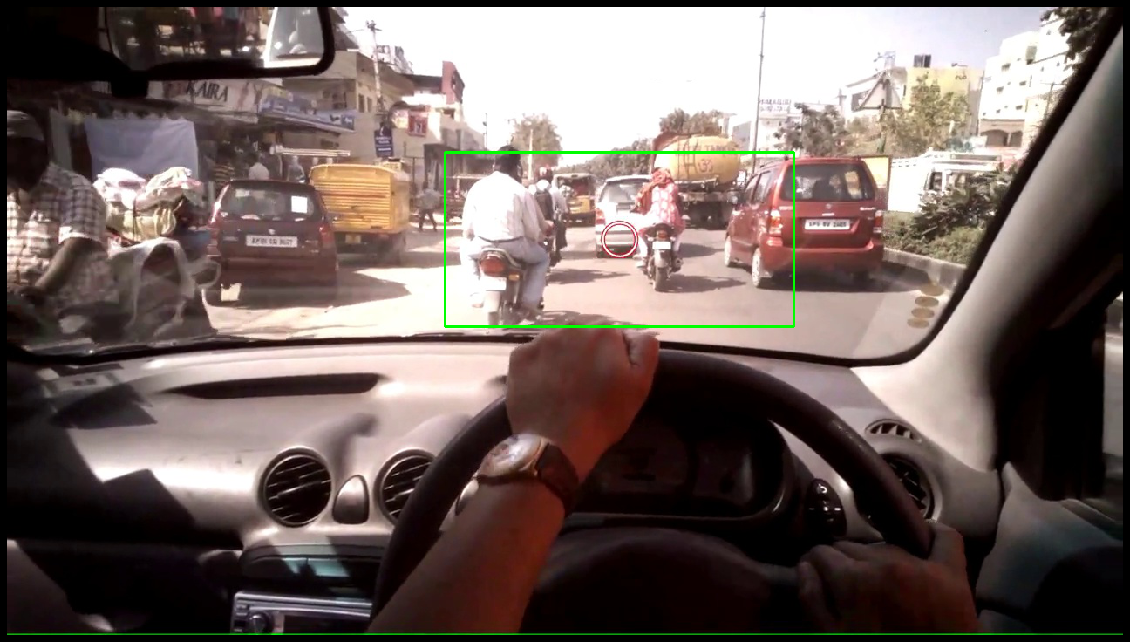

In [8]:
img = cv2.imread("./data/frame900.jpg", 0)
gray_blurred = cv2.blur(img, (3, 3)) 

detected_circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, param2 = 30, minRadius = 20, maxRadius = 23) 

count = 0
rectUp = np.asarray([0,0])
rectDown = np.asarray([0,0])
if detected_circles is not None: 
    count += 1
    print(count)
    detected_circles = np.uint16(np.around(detected_circles)) 
  
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
  
        # # Draw the circumference of the circle. 
        # cv2.circle(rgb_image, (a, b), r, (255, 0, 0), 2) 
        # # Draw a small circle (of radius 1) to show the center. 
        # cv2.circle(rgb_image, (a, b), 1, (255, 0, 0), 3)

        rectUp[0], rectUp[1] = a - 200, b - 100
        rectDown[0], rectDown[1] = a + 200, b + 100
        cv2.rectangle(rgb_image,(a-200,b-100),(a+200,b+100),(0,255,0),2)
        plt.figure(figsize = (20,20)) 
        plt.axis("off")
        plt.imshow(rgb_image)

In [15]:
def blurImage(image, rectUp, rectDown):
    blur = cv2.GaussianBlur(image,(19,19),0)
    blur_less = cv2.GaussianBlur(image, (11,11), 0)
    blur_more = cv2.GaussianBlur(image, (15,15), 0)
    # blur = np.ones_like((image))
    first_layer = 60
    second_layer = 150
    blur[rectUp[1] - first_layer:rectDown[1] + first_layer, rectUp[0] - first_layer:rectDown[0] + first_layer] =\
     blur_less[rectUp[1] - first_layer :rectDown[1] + first_layer, rectUp[0] - first_layer:rectDown[0] + first_layer]
    
    blur[rectUp[1] - second_layer:rectDown[1] + second_layer, rectUp[0] - second_layer:rectDown[0] + second_layer] =\
     blur_more[rectUp[1] - second_layer :rectDown[1] + second_layer, rectUp[0] - second_layer:rectDown[0] + second_layer]
    
#     blur = cv2.GaussianBlur(blur, (39,39), 0)
    # blur = cv2.bilateralFilter(blur, 15, 80, 80);
    blur[rectUp[1] - 2:rectDown[1] + 2, rectUp[0] - 2:rectDown[0] + 2] = image[rectUp[1] -2 :rectDown[1] + 2, rectUp[0]- 2:rectDown[0] + 2]

    return blur

In [16]:
final = blurImage(rgb_image, rectUp, rectDown)

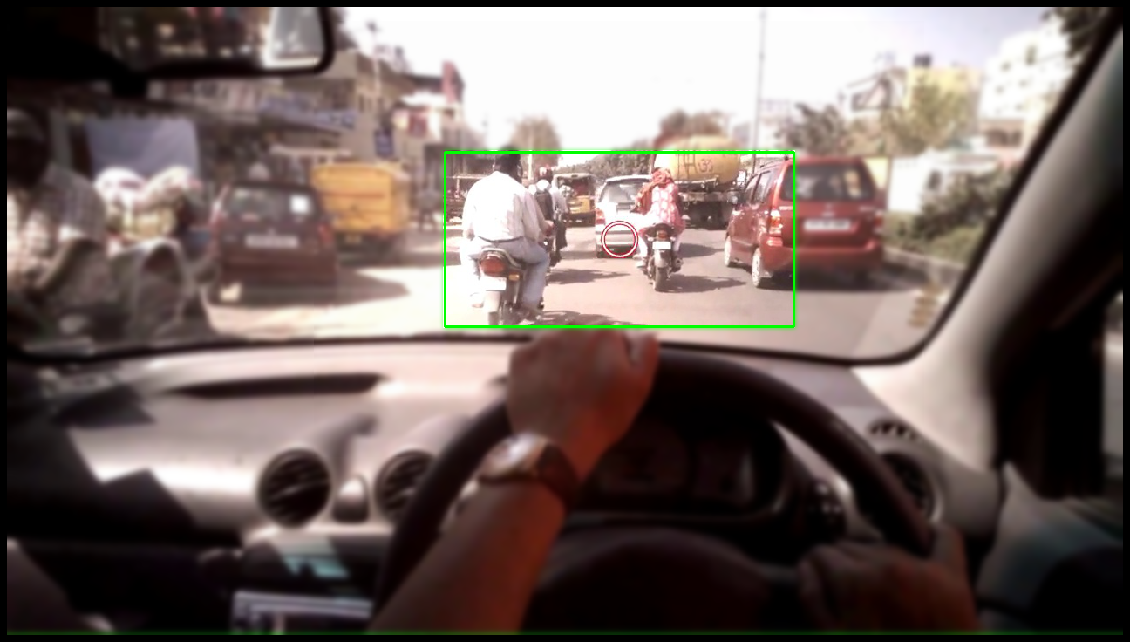

In [17]:
plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(final.astype("uint8"))

Perception: Update based on previous data. For now, remove circle, focus on stitching video back together
- Memory, how much we actually observe 

- What questions to ask

- What decisions to take next

Eye tracking while watching the video: would be best

|_ generate heat maps based on this

|_ Does blurring out really have some effect

Blurring slightly is similar to how actual visual perception looks like: use scientfic stuff like foveal focus, how the eye tracker actually works, etc


26/27 : send update on video, working on removing circle
By next week, write a detailed report on goal, what to accomplish